In [6]:
import pandas as pd
import numpy as np

In [7]:
data1 = pd.read_csv("../data/data1.csv")

## data4 - Brand

In [8]:
data4 = data1.groupby(['category_id', "brand", 'event_type']).agg({'event_type':'count'})
data4 = data4.unstack()
data4.reset_index(inplace=True)
data4.columns = ["category_id","brand", "cart","purchase","remove_from_cart","view"]

data4= data4.fillna(0)

data4["View-Cart"] = data4["cart"]/data4["view"]
data4["Cart-Purchase"] = data4["purchase"]/data4["cart"]
data4["View-Purchase"] = data4["purchase"]/data4["view"]
data4["Cart-Remove"] = data4["remove_from_cart"]/data4["cart"]

data4

,category_id,brand,cart,purchase,remove_from_cart,view,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
0,1487580004807082827,yllozure,10.0,4.0,3.0,89.0,0.112360,0.400000,0.044944,0.300000
1,1487580004832248652,beautix,19254.0,2957.0,15896.0,30454.0,0.632232,0.153578,0.097097,0.825595
2,1487580004857414477,candy,640.0,70.0,523.0,452.0,1.415929,0.109375,0.154867,0.817187
3,1487580004857414477,lianail,22538.0,3786.0,22745.0,31271.0,0.720732,0.167983,0.121071,1.009184
4,1487580004941300560,orly,76.0,10.0,48.0,454.0,0.167401,0.131579,0.022026,0.631579
...,...,...,...,...,...,...,...,...,...,...
2733,2235524499636224267,keune,2.0,0.0,1.0,40.0,0.050000,0.000000,0.000000,0.500000
2734,2235524499636224267,kezy,5.0,1.0,2.0,76.0,0.065789,0.200000,0.013158,0.400000
2735,2235524499636224267,osmo,3.0,0.0,3.0,26.0,0.115385,0.000000,0.000000,1.000000
2736,2242903426784559183,dobrovit,10.0,2.0,3.0,40.0,0.250000,0.200000,0.050000,0.300000


In [9]:
data_brand = data4

In [10]:
# fill the null value and infinte value
data_brand = data_brand.replace([np.inf], 1)
data_brand = data_brand.replace([np.nan], 0)

In [11]:
# create a new data frame with conversion rate for each brand
data_brand_cluster = pd.DataFrame(data_brand["View-Cart"])
data_brand_cluster["Cart-Purchase"] = data_brand["Cart-Purchase"]
data_brand_cluster["View-Purchase"] = data_brand["View-Purchase"]
data_brand_cluster["Cart-Remove"] = data_brand["Cart-Remove"]

In [12]:
data_brand

,category_id,brand,cart,purchase,remove_from_cart,view,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
0,1487580004807082827,yllozure,10.0,4.0,3.0,89.0,0.112360,0.400000,0.044944,0.300000
1,1487580004832248652,beautix,19254.0,2957.0,15896.0,30454.0,0.632232,0.153578,0.097097,0.825595
2,1487580004857414477,candy,640.0,70.0,523.0,452.0,1.415929,0.109375,0.154867,0.817187
3,1487580004857414477,lianail,22538.0,3786.0,22745.0,31271.0,0.720732,0.167983,0.121071,1.009184
4,1487580004941300560,orly,76.0,10.0,48.0,454.0,0.167401,0.131579,0.022026,0.631579
...,...,...,...,...,...,...,...,...,...,...
2733,2235524499636224267,keune,2.0,0.0,1.0,40.0,0.050000,0.000000,0.000000,0.500000
2734,2235524499636224267,kezy,5.0,1.0,2.0,76.0,0.065789,0.200000,0.013158,0.400000
2735,2235524499636224267,osmo,3.0,0.0,3.0,26.0,0.115385,0.000000,0.000000,1.000000
2736,2242903426784559183,dobrovit,10.0,2.0,3.0,40.0,0.250000,0.200000,0.050000,0.300000


In [13]:
data_brand_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
0,0.112360,0.400000,0.044944,0.300000
1,0.632232,0.153578,0.097097,0.825595
2,1.415929,0.109375,0.154867,0.817187
3,0.720732,0.167983,0.121071,1.009184
4,0.167401,0.131579,0.022026,0.631579
...,...,...,...,...
2733,0.050000,0.000000,0.000000,0.500000
2734,0.065789,0.200000,0.013158,0.400000
2735,0.115385,0.000000,0.000000,1.000000
2736,0.250000,0.200000,0.050000,0.300000


In [14]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer

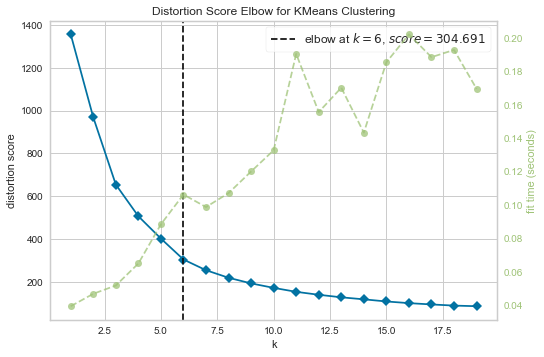

In [15]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(data_brand_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Apply K-Means on Full Dataset

In [16]:
kmeans = KMeans(n_clusters = 3, n_jobs = -1, verbose = 10)
data_pred_brand = kmeans.fit_predict(data_brand_cluster)

In [17]:
brand_label = pd.DataFrame(data_pred_brand)

In [19]:
brand_label["brand"] = data_brand["brand"]

In [20]:
data_brand_cluster["labels"] = brand_label[0]

In [21]:
data_brand_cluster["category_id"] = data_brand["category_id"]

In [22]:
data_brand_gp = data_brand_cluster.groupby(["labels"]).agg({"View-Cart": "mean", "Cart-Purchase": "mean", "View-Purchase": "mean", "Cart-Remove": "mean"})

In [23]:
data_brand_gp

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
labels,,,,
0,1.166352,0.228609,0.262996,0.594227
1,0.088840,0.375000,0.024242,10.416667
2,0.314430,0.165589,0.060884,0.567190


Interprete the cluster result
- 0: Not Popular
- 1: Protential
- 2: Popular - Directly Purchase
- 3: Popular - Purchase from Cart

In [24]:
data_brand_cluster["labels"].replace({0: "Not Popular Category", 1: "Protential Popular Category", 2: "Popular Category(Cart)", 3: "Popular Category(View)"}, inplace=True)

In [25]:
brand_label[0].replace({0: "Not Popular Category", 1: "Protential Popular Category", 2: "Popular Category(Cart)", 3: "Popular Category(View)"}, inplace=True)

In [26]:
data_brand_cluster["brand"] = data_brand["brand"]

In [27]:
data_brand_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,labels,category_id,brand
0,0.112360,0.400000,0.044944,0.300000,Popular Category(Cart),1487580004807082827,yllozure
1,0.632232,0.153578,0.097097,0.825595,Popular Category(Cart),1487580004832248652,beautix
2,1.415929,0.109375,0.154867,0.817187,Not Popular Category,1487580004857414477,candy
3,0.720732,0.167983,0.121071,1.009184,Popular Category(Cart),1487580004857414477,lianail
4,0.167401,0.131579,0.022026,0.631579,Popular Category(Cart),1487580004941300560,orly
...,...,...,...,...,...,...,...
2733,0.050000,0.000000,0.000000,0.500000,Popular Category(Cart),2235524499636224267,keune
2734,0.065789,0.200000,0.013158,0.400000,Popular Category(Cart),2235524499636224267,kezy
2735,0.115385,0.000000,0.000000,1.000000,Popular Category(Cart),2235524499636224267,osmo
2736,0.250000,0.200000,0.050000,0.300000,Popular Category(Cart),2242903426784559183,dobrovit


In [28]:
brand_label

,0,brand
0,Popular Category(Cart),yllozure
1,Popular Category(Cart),beautix
2,Not Popular Category,candy
3,Popular Category(Cart),lianail
4,Popular Category(Cart),orly
...,...,...
2733,Popular Category(Cart),keune
2734,Popular Category(Cart),kezy
2735,Popular Category(Cart),osmo
2736,Popular Category(Cart),dobrovit


In [29]:
data_brand_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,labels,category_id,brand
0,0.112360,0.400000,0.044944,0.300000,Popular Category(Cart),1487580004807082827,yllozure
1,0.632232,0.153578,0.097097,0.825595,Popular Category(Cart),1487580004832248652,beautix
2,1.415929,0.109375,0.154867,0.817187,Not Popular Category,1487580004857414477,candy
3,0.720732,0.167983,0.121071,1.009184,Popular Category(Cart),1487580004857414477,lianail
4,0.167401,0.131579,0.022026,0.631579,Popular Category(Cart),1487580004941300560,orly
...,...,...,...,...,...,...,...
2733,0.050000,0.000000,0.000000,0.500000,Popular Category(Cart),2235524499636224267,keune
2734,0.065789,0.200000,0.013158,0.400000,Popular Category(Cart),2235524499636224267,kezy
2735,0.115385,0.000000,0.000000,1.000000,Popular Category(Cart),2235524499636224267,osmo
2736,0.250000,0.200000,0.050000,0.300000,Popular Category(Cart),2242903426784559183,dobrovit


In [30]:
category_label = pd.read_csv("category_label.csv")
category_label

,Unnamed: 0,category_id,label
0,0,1487580004807082827,Not Popular Category
1,1,1487580004832248652,Protential Popular Category
2,2,1487580004857414477,Protential Popular Category
3,3,1487580004882580302,Protential Popular Category
4,4,1487580004916134735,Protential Popular Category
...,...,...,...
520,520,2222113024708182273,Not Popular Category
521,521,2235524494015856752,Not Popular Category
522,522,2235524499216793855,Not Popular Category
523,523,2235524499636224267,Not Popular Category


In [31]:
category_label["category_label"] = category_label["label"]
del category_label["label"]

In [32]:
data_brand_cluster = pd.merge(data_brand_cluster, category_label, how='inner', on='category_id')

In [33]:
data_brand_cluster
del data_brand_cluster["Unnamed: 0"]

In [34]:
data_brand_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,labels,category_id,brand,category_label
0,0.112360,0.400000,0.044944,0.300000,Popular Category(Cart),1487580004807082827,yllozure,Not Popular Category
1,0.632232,0.153578,0.097097,0.825595,Popular Category(Cart),1487580004832248652,beautix,Protential Popular Category
2,1.415929,0.109375,0.154867,0.817187,Not Popular Category,1487580004857414477,candy,Protential Popular Category
3,0.720732,0.167983,0.121071,1.009184,Popular Category(Cart),1487580004857414477,lianail,Protential Popular Category
4,0.167401,0.131579,0.022026,0.631579,Popular Category(Cart),1487580004941300560,orly,Not Popular Category
...,...,...,...,...,...,...,...,...
2733,0.050000,0.000000,0.000000,0.500000,Popular Category(Cart),2235524499636224267,keune,Not Popular Category
2734,0.065789,0.200000,0.013158,0.400000,Popular Category(Cart),2235524499636224267,kezy,Not Popular Category
2735,0.115385,0.000000,0.000000,1.000000,Popular Category(Cart),2235524499636224267,osmo,Not Popular Category
2736,0.250000,0.200000,0.050000,0.300000,Popular Category(Cart),2242903426784559183,dobrovit,Not Popular Category


In [85]:
data_brand_cluster["category_label"].unique()

array(['Not Popular Category', 'Protential Popular Category',
       'Popular Category'], dtype=object)

In [111]:
brand_category = data_brand_cluster[data_brand_cluster["category_label"] == "Popular Category"]

### Count the number of categories for each brand with higher&lowest four conversion rate  

In [112]:
def func_max(x, y):
    return x[x[y] == x[y].max()]["brand"]

def func_min(x, y):
    return x[x[y] == x[y].min()]["brand"]

In [113]:
VC_max = pd.DataFrame(brand_category.groupby(["category_id"]).apply(func_max, "View-Cart"))
VC_max.reset_index(inplace=True)
VC_max = VC_max.drop(["level_1"], axis = 1)
VC_max.columns =["category_id", "VC_max_brand"]

In [114]:
VC_max.groupby(["VC_max_brand"]).agg({"category_id": "count"}).sort_values(by = "category_id", ascending = False)

,category_id
VC_max_brand,
runail,13
irisk,8
ingarden,4
swarovski,3
airnails,2
severina,2
domix,2
masura,1
supertan,1


In [115]:
VC_min = pd.DataFrame(brand_category.groupby(["category_id"]).apply(func_min, "View-Cart"))
VC_min.reset_index(inplace=True)
VC_min = VC_min.drop(["level_1"], axis = 1)
VC_min.columns =["category_id", "VC_min_brand"]

In [116]:
VC_min.groupby(["VC_min_brand"]).agg({"category_id": "count"}).sort_values(by = "category_id", ascending = False)

,category_id
VC_min_brand,
irisk,6
runail,6
masura,5
ingarden,4
candy,3
entity,3
konad,2
uno,2
depilflax,2


In [117]:
CP_max = pd.DataFrame(brand_category.groupby(["category_id"]).apply(func_max, "Cart-Purchase"))
CP_max.reset_index(inplace=True)
CP_max = CP_max.drop(["level_1"], axis = 1)
CP_max.columns =["category_id", "CP_max_brand"]

In [118]:
CP_max.groupby(["CP_max_brand"]).agg({"category_id": "count"}).sort_values(by = "category_id", ascending = False)

,category_id
CP_max_brand,
runail,13
irisk,6
ingarden,3
milv,2
swarovski,2
severina,2
masura,2
zinger,2
de.lux,2


In [119]:
CP_min = pd.DataFrame(brand_category.groupby(["category_id"]).apply(func_min, "Cart-Purchase"))
CP_min.reset_index(inplace=True)
CP_min = CP_min.drop(["level_1"], axis = 1)
CP_min.columns =["category_id", "CP_min_brand"]

In [120]:
CP_min.groupby(["CP_min_brand"]).agg({"category_id": "count"}).sort_values(by = "category_id", ascending = False)

,category_id
CP_min_brand,
irisk,6
runail,5
masura,5
ingarden,3
kiss,3
candy,3
domix,2
konad,2
solomeya,2


In [121]:
VP_max = pd.DataFrame(brand_category.groupby(["category_id"]).apply(func_max, "View-Purchase"))
VP_max.reset_index(inplace=True)
VP_max = VP_max.drop(["level_1"], axis = 1)
VP_max.columns =["category_id", "VP_max_brand"]

In [122]:
VP_max.groupby(["VP_max_brand"]).agg({"category_id": "count"}).sort_values(by = "category_id", ascending = False)

,category_id
VP_max_brand,
runail,14
irisk,7
swarovski,3
ingarden,3
domix,2
severina,2
jessnail,2
airnails,2
de.lux,1


In [123]:
VP_min = pd.DataFrame(brand_category.groupby(["category_id"]).apply(func_min, "View-Purchase"))
VP_min.reset_index(inplace=True)
VP_min = VP_min.drop(["level_1"], axis = 1)
VP_min.columns =["category_id", "VP_min_brand"]

In [124]:
VP_min.groupby(["VP_min_brand"]).agg({"category_id": "count"}).sort_values(by = "category_id", ascending = False)

,category_id
VP_min_brand,
irisk,6
runail,6
masura,5
ingarden,4
entity,3
candy,3
domix,2
kiss,2
jessnail,2


In [125]:
CR_max = pd.DataFrame(brand_category.groupby(["category_id"]).apply(func_max, "Cart-Remove"))
CR_max.reset_index(inplace=True)
CR_max = CR_max.drop(["level_1"], axis = 1)
CR_max.columns =["category_id", "CR_max_brand"]

In [126]:
CR_max.groupby(["CR_max_brand"]).agg({"category_id": "count"}).sort_values(by = "category_id", ascending = False)

,category_id
CR_max_brand,
irisk,10
runail,7
candy,3
solomeya,2
yoko,2
rosi,2
domix,2
f.o.x,2
naomi,1


In [127]:
CR_min = pd.DataFrame(brand_category.groupby(["category_id"]).apply(func_min, "Cart-Remove"))
CR_min.reset_index(inplace=True)
CR_min = CR_min.drop(["level_1"], axis = 1)
CR_min.columns =["category_id", "CR_min_brand"]

In [128]:
CR_min.groupby(["CR_min_brand"]).agg({"category_id": "count"}).sort_values(by = "category_id", ascending = False)

,category_id
CR_min_brand,
runail,9
ingarden,6
masura,5
irisk,4
domix,2
swarovski,2
jessnail,2
depilflax,2
konad,2
